# Data Visualization
Applying Data Visualization to a clean dataset of Colombia COVID-19 Cases, with 2273728 rows.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Datasets/covid_col_limpio.csv", low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935082 entries, 0 to 2935081
Data columns (total 11 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Unnamed: 0             int64 
 1   Nombre departamento    object
 2   Nombre municipio       object
 3   Edad                   int64 
 4   Sexo                   object
 5   Fecha inicio sintomas  object
 6   Fecha diagnostico      object
 7   Tipo de contagio       object
 8   Ubicacion caso         object
 9   Estado                 object
 10  Edad categorizada      object
dtypes: int64(2), object(9)
memory usage: 246.3+ MB


In [3]:
data = data[['Nombre departamento', 'Nombre municipio', 'Edad', 'Edad categorizada', 'Sexo', 'Tipo de contagio', 'Ubicacion caso', 'Estado']]

In [4]:
data

,Nombre departamento,Nombre municipio,Edad,Edad categorizada,Sexo,Tipo de contagio,Ubicacion caso,Estado
0,BOGOTA,BOGOTA,19,Joven Adulto,F,Importado,Casa,Leve
1,VALLE,BUGA,34,Adulto,M,Importado,Casa,Leve
2,ANTIOQUIA,MEDELLIN,50,Adulto,F,Importado,Casa,Leve
3,ANTIOQUIA,MEDELLIN,55,Adulto,M,Relacionado,Casa,Leve
4,ANTIOQUIA,MEDELLIN,25,Joven Adulto,M,Relacionado,Casa,Leve
...,...,...,...,...,...,...,...,...
2935077,CAUCA,POPAYAN,62,Anciano,M,En estudio,Casa,Leve
2935078,CAUCA,POPAYAN,34,Adulto,F,En estudio,Casa,Leve
2935079,CAUCA,PIENDAMO,47,Adulto,F,En estudio,Casa,Leve
2935080,CAUCA,TIMBIO,71,Anciano,M,En estudio,Casa,Leve


In [5]:
columnas = ['Nombre departamento', 'Nombre municipio', 'Sexo', 'Edad categorizada', 'Tipo de contagio', 'Ubicacion caso', 'Estado']
for col in columnas:
    data[col] = data[col].astype("category")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935082 entries, 0 to 2935081
Data columns (total 8 columns):
 #   Column               Dtype   
---  ------               -----   
 0   Nombre departamento  category
 1   Nombre municipio     category
 2   Edad                 int64   
 3   Edad categorizada    category
 4   Sexo                 category
 5   Tipo de contagio     category
 6   Ubicacion caso       category
 7   Estado               category
dtypes: category(7), int64(1)
memory usage: 44.8 MB


In [7]:
data_count = data.groupby(['Estado'], sort=False).size().reset_index(name='Count')
print(data_count)

      Estado    Count
0       Leve  2829429
1  Fallecido    85891
2   Moderado    15061
3      Grave     4701


#### Total de casos por Estado

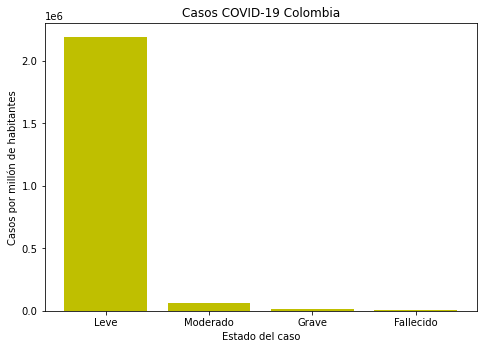

In [8]:
x = data['Estado']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
estados = ['Leve', 'Moderado', 'Grave', 'Fallecido']
casos = [2196029,60676,14526,2497]
ax.bar(estados,casos, color='y')
ax.set_xlabel('Estado del caso')
ax.set_ylabel('Casos por millón de habitantes')
ax.set_title('Casos COVID-19 Colombia')
plt.show()

In [9]:
estados = ['Leve', 'Moderado', 'Grave', 'Fallecido']

data_estado_sexo = data.groupby('Estado')['Sexo'].value_counts()
data_estado_sexo

Estado     Sexo
Fallecido  M         53297
           F         32594
Grave      M          2805
           F          1896
Leve       F       1485434
           M       1343995
Moderado   M          7999
           F          7062
Name: Sexo, dtype: int64

In [10]:
data_estado_sexo.unstack('Estado')                   

Estado,Fallecido,Grave,Leve,Moderado
Sexo,,,,
F,32594,1896,1485434,7062
M,53297,2805,1343995,7999


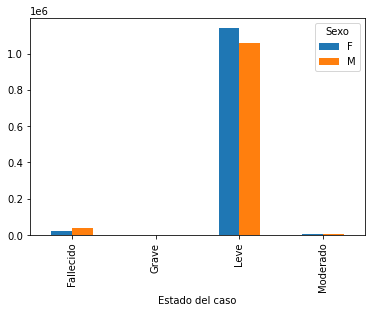

In [11]:
df = pd.DataFrame([['Leve','F',1140701],['Moderado','F',6644],['Grave','F',949],['Fallecido','F',22077],
                   ['Leve','M',1055328],['Moderado','M',7882], ['Grave','M',1548],['Fallecido','M',38599]],columns=['Estado del caso','Sexo','val'])
df.pivot("Estado del caso", "Sexo", "val").plot(kind='bar')

plt.show()

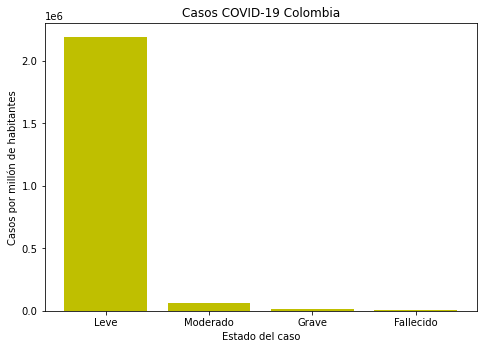

In [12]:
x = data['Estado']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

casos = [2196029,60676,14526,2497]
ax.bar(estados,casos, color='y')
ax.set_xlabel('Estado del caso')
ax.set_ylabel('Casos por millón de habitantes')
ax.set_title('Casos COVID-19 Colombia')
plt.show()

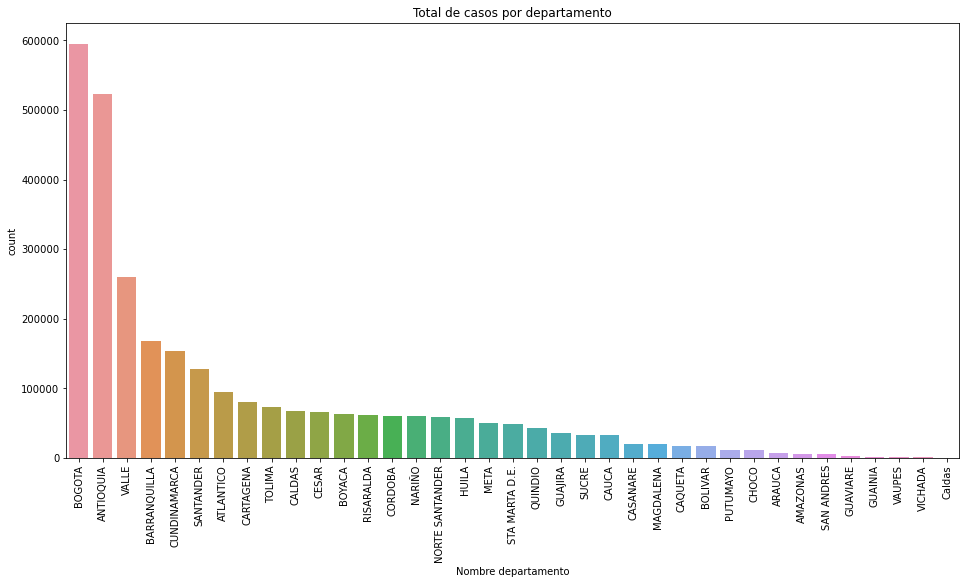

In [13]:
plt.subplots(figsize=(16,8))
casos = data['Nombre departamento'].value_counts().index
sns.countplot(data=data, x = data['Nombre departamento'], order=casos).set_title("Total de casos por departamento")
plt.xticks(rotation=90)
plt.show()

In [14]:
data['Edad categorizada'].value_counts()

Adulto              1736669
Joven Adulto         508168
Anciano              436955
Adolescente          120069
Infancia              74945
Primera Infancia      58276
Name: Edad categorizada, dtype: int64

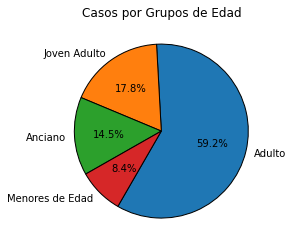

In [15]:
count_menores_de_edad = 44428 + 56817 +90563
slices = [1346198, 405489, 330233, count_menores_de_edad]
labels = ['Adulto', 'Joven Adulto', 'Anciano', 'Menores de Edad']

plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'}, startangle=240, autopct='%1.1f%%')

plt.title("Casos por Grupos de Edad")
plt.show()

In [16]:
data['Tipo de contagio'].value_counts()

En estudio     1656786
Comunitaria     854377
Relacionado     421084
Importado         2835
Name: Tipo de contagio, dtype: int64

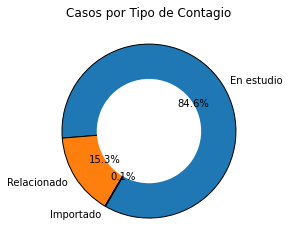

In [17]:
slices = [1924186, 347135, 2407]
labels = ['En estudio', 'Relacionado', 'Importado']

plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'}, startangle=240, autopct='%1.1f%%')

plt.title("Casos por Tipo de Contagio")

# Creating the circle for forming a donut chart
circle = plt.Circle(xy=(0,0), radius=0.6, facecolor='white')
plt.gca().add_artist(circle)

plt.show()